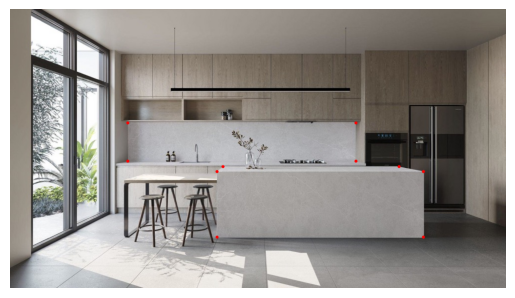

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mark_points(image_path, points, output_path="mark.png", color=(0, 0, 255), radius=3, thickness=-1):
    image = cv2.imread(image_path)
    
    # Mark
    for point in points:
        cv2.circle(image, point, radius, color, thickness)
    
    cv2.imwrite(output_path, image)

    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

image_path = "original.jpg"
points = [(237, 229), (237, 306), (697, 229), (697, 306), (429, 317), (417, 327), (784, 317), (833, 327), (417, 459), (833, 459)]
mark_points(image_path, points)

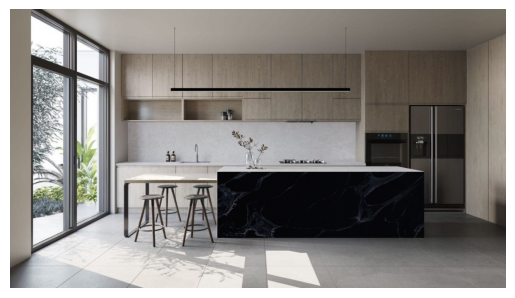

In [ ]:
original = cv2.imread('original.jpg')
texture = cv2.imread('texture.jpg')

x1, y1 = 418, 328 
x2, y2 = 835, 461  
width = x2 - x1
height = y2 - y1

# Resize the texture image to match the region dimensions
texture_resized = cv2.resize(texture, (width, height))

# Replace the region with texture
output = original.copy()
output[y1:y2, x1:x2] = texture_resized

cv2.imwrite('output1.jpg', output)

# Display
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output_rgb)
plt.axis('off')
plt.show()

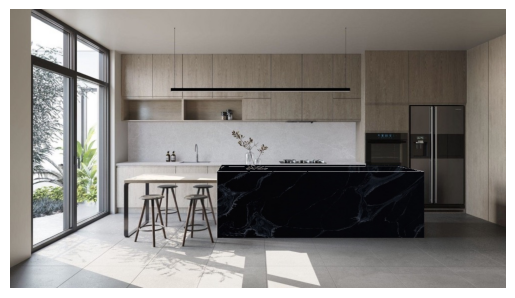

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image = cv2.imread('output1.jpg')
texture = cv2.imread('texture.jpg')

x1, y1 = 426, 314
x2, y2 = 417, 329
x3, y3 = 785, 314
x4, y4 = 833, 329

# Create a mask for the region of interest
mask = np.zeros(image.shape[:2], dtype=np.uint8)
roi_corners = np.array([[x1, y1], [x2, y2], [x4, y4], [x3, y3]], dtype=np.int32)
cv2.fillPoly(mask, [roi_corners], 255)

# Create a slightly smaller mask to avoid detecting the boundary
eroded_mask = cv2.erode(mask, np.ones((1,1), np.uint8), iterations=1)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
masked_gray = cv2.bitwise_and(gray, gray, mask=eroded_mask)
edges = cv2.Canny(masked_gray, 100, 200)

# Dilate the edges slightly
kernel = np.ones((1, 1), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

# Create obstacle mask from the edges but apply it to the original mask area
obstacle_mask = cv2.bitwise_and(dilated_edges, mask)
non_obstacle_mask = cv2.bitwise_not(obstacle_mask)
non_obstacle_mask = cv2.bitwise_and(non_obstacle_mask, mask)

# Resize texture to match the image size
texture_resized = cv2.resize(texture, (image.shape[1], image.shape[0]))

# Apply texture to non-obstacle areas
result = image.copy()
texture_applied = cv2.bitwise_and(texture_resized, texture_resized, mask=non_obstacle_mask)
image_masked = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(non_obstacle_mask))
result = cv2.add(image_masked, texture_applied)

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)
plt.axis("off")
plt.show()
cv2.imwrite('output2.jpg', result)